# ML Dataset TELEKOM

Per prima cosa importiamo i dati, utilizzando la libreria di alto livello **Pandas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('/Users/alfonsodamelio/Downloads/telekom.csv',delimiter=',')

In [3]:
#vediamo le prime 5 righe del nostro dataset per renderci conto dei dati con cui abbiamo a che fare.
dataset.head(5)

,ID,status,piano_tariff,metodo_pagamento,sesso,etacl,zona_attivaz,canale_attivaz,vas1,vas2,...,q01_in_dur_tot,q01_ch_sms,q09_out_ch_peak,q09_out_dur_peak,q09_out_val_peak,q09_out_dur_offpeak,q09_out_val_offpeak,q09_in_ch_tot,q09_in_dur_tot,q09_ch_sms
0,7043,0,8,3,3,30.75,3,5,1,1,...,2162,0,78,5190,34.6450,0,0.0,123,10715,0
1,7045,0,8,1,3,20.78,2,5,1,1,...,0,0,11,719,4.8191,0,0.0,31,3115,1
2,7046,0,7,3,3,19.80,1,5,1,1,...,0,0,50,2665,14.1168,0,0.0,170,14807,0
3,7048,0,8,2,3,21.67,1,9,1,1,...,0,0,65,7216,43.6824,0,0.0,25,3334,0
4,7049,0,8,2,1,24.75,1,5,1,1,...,0,0,0,0,0.0000,0,0.0,0,0,0


### Recap

Bisogna prima di tutto dire che stiamo lavorando su un unico dataset, quindi:
- Divideremo il seguente in train e test, alleneremo il nostro algoritmo sul train e predirremo la classificazione sul test

Di seguito espongo il procedimento che seguirò nell'analisi del seguente dataset di Telekom:
+ Rimuovo la variabile 'ID' in quanto non utile ai fini della predizione.
+ Vado a vedere se ci sono "NaN" (missing values)
    - nel caso in cui ci fossero imputiamo con media o mediana i valori mancanti
+ Divido il Dataset in $X$ ed $y$. La $X$ saranno tutte le features tranne la variabile risposta e la $y$ sarà la varibile outcome.
+ A questo punto essendo $X$ ed $y$ due array, possiamo fare l'encoding in variabili dummy delle categorical feature mediante l'utilizzo di One Hot Encoder (sklearn).
    * Nel caso in cui avessimo utilizzato *pd.get_dummies* invece di *one hot encoding*, lo avremmo potuto fare prima di splittare in $X$ ed $y$.
+ Fatto l'encoding delle variabili posso splittare (train_test_split) in TRAIN & TEST.
+ alleno l'algoritmo sul mio TRAIN con alberi decisonali, reti neurali o linear classifier.
+ uso metriche come $\rightarrow$ Accuracy, confusion metrics e AUC, ROC curve
+ Per migliorare la classificazione binaria si potrebbe provare a blianciare la variabile target nel train e poi provare ad allenare l'algoritmo (over sampling)
    + **SMOTE**

In [4]:
#drop ID features
dataset=dataset.drop('ID',axis=1)
dataset.head(5)

,status,piano_tariff,metodo_pagamento,sesso,etacl,zona_attivaz,canale_attivaz,vas1,vas2,q01_out_ch_peak,...,q01_in_dur_tot,q01_ch_sms,q09_out_ch_peak,q09_out_dur_peak,q09_out_val_peak,q09_out_dur_offpeak,q09_out_val_offpeak,q09_in_ch_tot,q09_in_dur_tot,q09_ch_sms
0,0,8,3,3,30.75,3,5,1,1,45,...,2162,0,78,5190,34.6450,0,0.0,123,10715,0
1,0,8,1,3,20.78,2,5,1,1,0,...,0,0,11,719,4.8191,0,0.0,31,3115,1
2,0,7,3,3,19.80,1,5,1,1,0,...,0,0,50,2665,14.1168,0,0.0,170,14807,0
3,0,8,2,3,21.67,1,9,1,1,0,...,0,0,65,7216,43.6824,0,0.0,25,3334,0
4,0,8,2,1,24.75,1,5,1,1,0,...,0,0,0,0,0.0000,0,0.0,0,0,0


**Missing-data**

In [ ]:
#check colonne con NA
dataset.isnull().values.any()
dataset.columns[dataset.isna().any()].tolist()

#Imputo le colonne con NA
from sklearn.preprocessing import Imputer
#use the mean (or "most_frequent") of the other elements in the coluomn
imputer = Imputer(missing_values = "NaN", strategy ="mean", axis = 0)#provare dopo con mediana
#only on the coluomns where there are missing values
imputer = imputer.fit(X[:, [1,3]])
X[:, [1,3]] = imputer.transform(X[:, [1,3]])

Utilizzo one Hot encoder per fare l'encoding delle variabili.

**N.B: Se le variabili contengono valori negativi, ad esempio un livello (-1), devo prima ricategorizzarlo.Cosa che get dummies fa da sola.**

Divido in $\rightarrow$ $X$ ed $y$

Faccio l'encoding delle seguenti features:

* piano_tariff
* metodo_pagamento
* sesso
* zona_attivaz
* canale_attivaz
* vas1
* vas2

In [5]:
dataset.drop('status',axis=1).head(5)

,piano_tariff,metodo_pagamento,sesso,etacl,zona_attivaz,canale_attivaz,vas1,vas2,q01_out_ch_peak,q01_out_dur_peak,...,q01_in_dur_tot,q01_ch_sms,q09_out_ch_peak,q09_out_dur_peak,q09_out_val_peak,q09_out_dur_offpeak,q09_out_val_offpeak,q09_in_ch_tot,q09_in_dur_tot,q09_ch_sms
0,8,3,3,30.75,3,5,1,1,45,2558,...,2162,0,78,5190,34.6450,0,0.0,123,10715,0
1,8,1,3,20.78,2,5,1,1,0,0,...,0,0,11,719,4.8191,0,0.0,31,3115,1
2,7,3,3,19.80,1,5,1,1,0,0,...,0,0,50,2665,14.1168,0,0.0,170,14807,0
3,8,2,3,21.67,1,9,1,1,0,0,...,0,0,65,7216,43.6824,0,0.0,25,3334,0
4,8,2,1,24.75,1,5,1,1,0,0,...,0,0,0,0,0.0000,0,0.0,0,0,0


In [6]:
#DIVIDO
X=dataset.drop('status',axis=1).values
y=dataset['status'].values

In [7]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[0,1,2,4,5,6,7])
X=onehotencoder.fit_transform(X).toarray()

A questo punto posso splittare il mio dataset ricodificato in train e test

In [8]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Provo alcuni classificatori:
+ Decision trees:
    * Random Forest
    * XGB
    * Gradient Boosting
+ Rete neurale
+ logistic 

**Importo metriche di valutazione**

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

**Random Forest Classifier**

Accuracy: 0.940306992609

Confusion matrix:
[[1026   51]
 [  54  628]]

auc: 0.985707467408


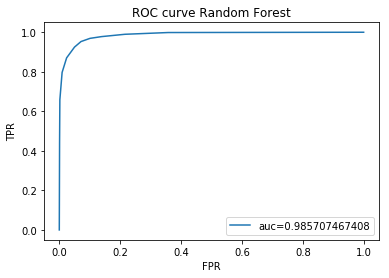

In [10]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

#calcolo accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = RFC.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Random Forest')
plt.legend(loc=4)
plt.show()

RF_out=[accuracy,auc]

**XGB classifier**

Accuracy: 0.973848777715

Confusion matrix:
[[1049   15]
 [  31  664]]

auc: 0.997214040255


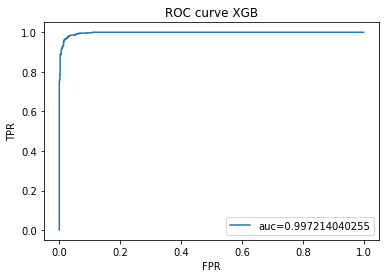

In [11]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred=XGB.predict(X_test)


#calcolo accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = XGB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve XGB')
plt.legend(loc=4)
plt.show()

XGB_out=[accuracy,auc]

**Gradient Boosting classifier**

Accuracy: 0.973280272882

Confusion matrix:
[[1048   15]
 [  32  664]]

auc: 0.997115856652


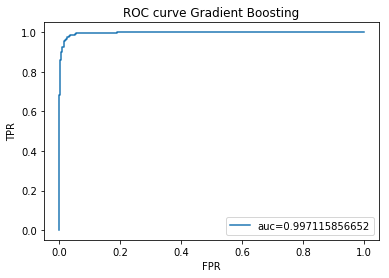

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting= GradientBoostingClassifier()
GradientBoosting.fit(X_train, y_train)
y_pred=GradientBoosting.predict(X_test)


#calcolo accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = GradientBoosting.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Gradient Boosting')
plt.legend(loc=4)
plt.show()

GB_out=[accuracy,auc]

**RETE NEURALE**

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


**Rete neurale**:
+ input
+ 3 hidden layer ciascuno formato da 8 neuroni
+ output 

In [2]:
model = Sequential()
model.add(Dense(8,input_dim=X_train.shape[1],activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=200,batch_size=64)



y_pred=model.predict(X_test)
y_pred1=[]
for i in range(0,len(y_pred)):
    y_pred1.append(np.round(y_pred[i][0]))
y_pred=np.array(y_pred1,dtype=np.int64)
accuracy=accuracy_score(y_pred,y_test)
print('accuracy: %s'%accuracy)
print()
print('confusion matrix: ')
cm=confusion_matrix(y_pred,y_test)
print(cm)

nn_out=[accuracy,'NA']

NameError: name 'X_train' is not defined

**Logistic Regression**

Accurcy: 0.861284820921

Confusion matrix:
[[981 145]
 [ 99 534]]

auc: 0.928945071729


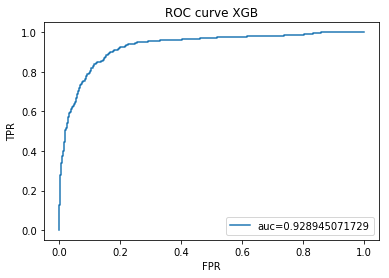

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy=accuracy_score(y_pred,y_test)
print('Accurcy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve XGB')
plt.legend(loc=4)
plt.show()

logistic_out=[accuracy,auc]

**Comparazione modelli**
+
+
+
+
+







In [21]:
compare=pd.DataFrame(list(zip(RF_out, XGB_out, GB_out,nn_out,logistic_out)),
                     index=pd.Series(['accuracy','auc'], name='metrics'),
              columns=['Random Forest','XGB', 'Gradient boosting','Neural network','Logistic'])
compare

,Random Forest,XGB,Gradient boosting,Neural network,Logistic
metrics,,,,,
accuracy,0.940307,0.973849,0.973280,0.870949,0.861285
auc,0.985707,0.997214,0.997116,NA,0.928945


### Balancing the data (TRAIN)

In [22]:
lab=[i for i in y_train]
zero=0
uno=0
for i in lab:
    if i==0:
        zero+=1
    elif i==1:
        uno+=1
print(uno)
print(zero)

2672
4361


Essendo che nella target label sembra esserci una divisione non equa tra "zeri" ed "uno", si potrebbe applicare un algoritmo di oversampling, portando cosi ad una equità tra le labels.

I cosiddetti “Unbalanced data” si riferiscono in genere a problemi di classificazione in cui le classi non sono rappresentate allo stesso modo.

Infatti nella maggior parte dei dataset riguardanti ‘classificazione’ non si ha esattamente un numero uguale di istanze in ogni classe.

DATASET che hanno questo problema sono ad esempio quelli riguardanti transazioni fraudolente, dove la stragrande maggioranza delle transazioni sarà nella classe “Non-Fraud” e una piccola minoranza sarà nella classe “Fraud”, oppure casi di set di dati come questi, nei quali la maggior parte dei consumatori risulta essere un cliente ‘REGOLARE’.

È possibile quindi modificare il dataset che si utilizza per avere dati più bilanciati. Questo approccio è chiamato campionamento del set di dati, e ci sono due metodi principali che è possibile utilizzare per uniformare le classi:
+ aggiungere copie di istanze dalla classe sottorappresentata denominata sovracampionamento 
+ eliminare le istanze dalla classe sovrarappresentata, chiamata sottocampionamento.

Ho usato il secondo metodo, mediante l’utilizzo di un algoritmo di OVER-SAMPLING chiamato **SMOTE** (*Synthetic Minority Over-sampling Technique*), in modo tale che il numero di record per ogni tipo di target (0,1) fosse uguale.

**N.B: questa tecnica viene ovviamente applicata solo al TRAIN in modo tale che l'algoritmo apprenda meglio.**

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.externals.joblib.parallel import _backend

sm = SMOTE(random_state=0, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)



lab=[i for i in y_train]
zero=0
uno=0
for i in lab:
    if i==0:
        zero+=1
    elif i==1:
        uno+=1
print('label 1: %s'%uno)
print('label 0: %s'%zero)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
#scale the X coloumns
sc_X = StandardScaler()
#for the training set we need to fit it, then scale it
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



label 1: 4361
label 0: 4361


/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


**BALANCE Random Forest**

Accuracy: 0.942012507106

Confusion matrix:
[[1036   58]
 [  44  621]]

auc: 0.982336497027


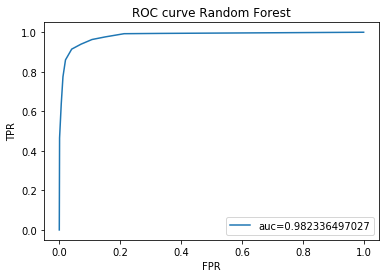

In [24]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

#calcolo accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = RFC.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Random Forest')
plt.legend(loc=4)
plt.show()

**BALANCE Gradient Boosting**

Accuracy: 0.974985787379

Confusion matrix:
[[1046   10]
 [  34  669]]

auc: 0.997312223859


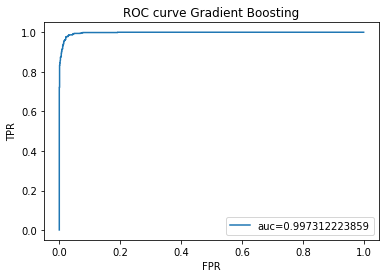

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting= GradientBoostingClassifier()
GradientBoosting.fit(X_train, y_train)
y_pred=GradientBoosting.predict(X_test)


#calcolo accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = GradientBoosting.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Gradient Boosting')
plt.legend(loc=4)
plt.show()

**BALANCE XGB Classifier**

Accuracy: 0.973280272882

Confusion matrix:
[[1042    9]
 [  38  670]]

auc: 0.997415862107


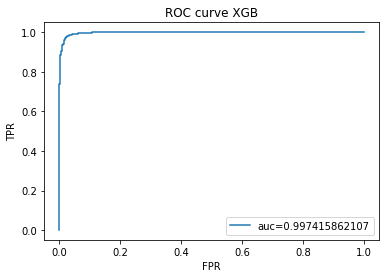

In [34]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred=XGB.predict(X_test)


#calcolo accuracy
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: '+str(accuracy))
print()
print('Confusion matrix:')
cm=confusion_matrix(y_pred,y_test)
print(cm)

y_pred_proba = XGB.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print()
print("auc: "+str(auc))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve XGB')
plt.legend(loc=4)
plt.show()

**in conclusione possiamo dire che il bilanciamento e lo scaling delle variabili non ha portato nessun beneficio.
Non ci rimane dunque che andare a vedere le tabelle attraverso il quale possiamo fare il confronto**

In [26]:
compare

,Random Forest,XGB,Gradient boosting,Neural network,Logistic
metrics,,,,,
accuracy,0.940307,0.973849,0.973280,0.870949,0.861285
auc,0.985707,0.997214,0.997116,NA,0.928945


**Si evince chiaramente come i modelli migliori siano:**

+ XGB
+ Gradient Boosting

Anche se di poco l'XGB risulta più performante, soprattutto in termini di **velocità**.

### NEL CASO DI CROSS VALIDATION

In [ ]:
from sklearn.cross_validation import cross_val_score
RFC = GradientBoostingClassifier(loss="exponential",learning_rate = .2, 
                                  n_estimators = 2000,max_depth=1,min_samples_leaf=15,min_samples_split=40)
y_pred = RFC.fit(X_train, y_train).predict(X_test)
cv_score = cross_val_score(RFC, X_test, y_test, scoring = 'accuracy', cv = 5)
print('CV Model Accuracy :' , cv_score.mean())
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
